## CS535/EE514 - Spring 2022 - Assignment 4 - Part A



#### Important Instructions and Submission Guidelines:
- Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. Naming convention for submission of this notebook is `RollNumber_partA_PA4.ipynb`. For example: `23100042_partA_PA4.ipynb`
- All the cells <b>must</b> be run once before submission. If your submission's cells are not showing the results (plots etc.), marks wil be deducted
- Only the code written within this notebook's marked areas will be considered while grading. No other files will be entertained
- You are advised to follow good programming practies including approriate variable naming and making use of logical comments.


The university honor code should be maintained. Any violation, if found, will result in disciplinary action. 


You are provided with a Sentiment Analysis dataset which contains
tweets extracted using the twitter API. You are supposed to implement and train a classifier which will predict the sentiment of a given tweet. </br>

**Setup**: </br>
By now you should be able to do the following: </br>


*   Mount Google Drive
*   Import required libraries



In [1]:
import pandas as pd
import re
import numpy as np
import string
string.punctuation
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline
from sklearn.model_selection import train_test_split
import nltk
from collections import defaultdict
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import math as m
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
import warnings
warnings.filterwarnings("ignore")

**Part 1: Data Preprocessing (10 Marks)**

The dataset can be found in the csv file available on this link: </br>
[Naive Bayes](https://drive.google.com/drive/folders/1gktC0tP2GgrzJIFkyuVXybLnnmSrX5Cc?usp=sharing)</br>
Read the .csv file. After reading the data, split your data into training and testing sets.

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
## Change column names to keep old implementation
train_set.rename(columns={'Sentiment': 'sentiment', 'Tweet': 'content'}, inplace=True)
test_set.rename(columns={'Sentiment': 'sentiment', 'Tweet': 'content'}, inplace=True)

In [3]:
train_set['content']

0       @USAirways disappointment? Making own arrangem...
1                                 @JetBlue my butt hurts.
2       @AmericanAir u Cancelled Flightled my flight f...
3       @AmericanAir all of these issues are not based...
4       @USAirways I just spent 3.5 hours and got nowh...
                              ...                        
3340    @USAirways Haha - that will indeed be a great ...
3341    Looking forward to using Passbook when I fly  ...
3342                 @SouthwestAir It's all good. Thanks!
3343    @VirginAmerica is the best airline I have flow...
3344    @united They let us know in advance of the reb...
Name: content, Length: 3345, dtype: object


In the preprocessing step, you are required to:
1. Remove stop words, unwanted symbols, punctuation marks, hyperlinks and usernames from the tweets 
2. Lower case the tweets. The list of stop words is provided to you along with
the dataset on the above link. </br>
Note: You may find the string and regex module useful for this task.


In [4]:
# Read stop words file
my_file = open("stop_words.txt", "r")
stop_words = my_file.read().split("\n")
my_file.close()

In [5]:
# Remove stopwords and other tags
# old dataset required deep preprocessing
def remove_stopwords(tweets):
  all_words = ""
  for word in word_tokenize(tweets):
    if not(word.lower() in stop_words):
    #and (not word.lower() in ['â½', 'â½m', 'â½n', 'â½s', 'â½t', 'â½ã',"â¦" ]):
      word = word.lower()
      all_words+= (word + " ")
  return all_words
  

def remove_tags(string): # remove punctutation and symbols etc
  removelist = ""
  result = re.sub(r'http\S+', '', string) 
  result = re.sub('@[\w]+','',result) 
  result = re.sub(r"(?<!#)\d+", "", result)  
  result = re.sub(r'[^a-zA-Z]', ' ', result)
  result = re.sub('\s*\\b([a-z]|[a-z]{1})\\b', ' ', result)
  result = re.sub(r'[\W_ + ½]+', ' ', result)
  result = result.lower()
  return result
  #return result


In [6]:
## apply above functions
train_set['content']=train_set['content'].apply(lambda x : remove_tags(x))
test_set['content']=test_set['content'].apply(lambda x : remove_tags(x))
#remove stopwords 
train_set['content']= train_set['content'].apply(lambda x:remove_stopwords(x))
test_set['content']= test_set['content'].apply(lambda x:remove_stopwords(x))



In [7]:
train_set['content']

0       disappointment making arrangements amp sleepin...
1                                             butt hurts 
2       cancelled flightled flight tomorrow tell call ...
3       issues based weather things control issues bas...
4       spent hours got nowhere entire experience epic...
                              ...                        
3340                               haha indeed great day 
3341            looking forward using passbook fly weeks 
3342                                         good thanks 
3343    best airline flown easy change reservation hel...
3344    let us know advance reboot yes thanks attentiv...
Name: content, Length: 3345, dtype: object

**Part 2: Bag of Words (10 Marks)**

Bag of Words (BOW) is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set.

In this task, you’ll represent each tweet as a bag-of-words (BoW), that is, an unordered set of words with their position ignored, keeping only their frequency in the tweet. </br>
For example, consider the below tweets: </br>
*   T1 = Welcome to machine learning, Machine! </br>
*   T2 = Machine learning is fun. </br>

The bag-of-words representation (ignoring case and punctuation) for the above tweets are: </br>
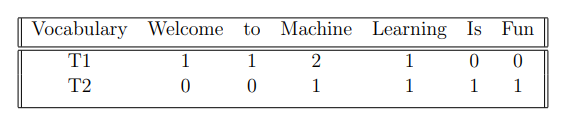

Basically, it will be a sparse matrix of size  = (Total Tweets x Length of Vocabulary). </br>
*Note: We only use the training set to construct the vocabulary for the BoW representation.*

In [8]:
vocab = []
for tweet in train_set['content']:
  vocab.extend((tweet.split()))
vocab = list(set(vocab))  # get rid of repeated words
##BOW
matrix = np.zeros((len(train_set.content),len(vocab)))
for i,tweet in enumerate(train_set['content']) :
  for word in (tweet.split()):
    ind = vocab.index(word)
    matrix[i][ind]+=1

X = matrix


In [9]:
# encoding for labels
from sklearn.preprocessing import LabelEncoder
labels = train_set['sentiment']
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)




In [10]:
#print(len(vocab),X.shape)

In [11]:
len(train_set)
print(len(vocab),matrix.shape)


5112 (3345, 5112)


**Part 3: Implementation of Na¨ıve Bayes classifier from
scratch (30 marks)**

Using the same bag of words that has been used earlier, implement a na¨ıve Bayes classifier. Do not forget to apply Laplace (Add-1) smoothing as learned in class. </br>
**If Scikit-Learn is used in this part, you will NOT get any credit.**

* **Training the Na¨ıve Bayes Classifier** 

$\frac{\theta}{\|\mathbf{w}\|}$

We need to find the log prior probabilities and log likelihoods for all words and all classes in the training set. The prior probability for any class $c$ is relatively easy to find, it is given by: </br>
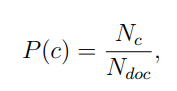 </br>
where $N_c$ is the number of documents in class $c$, and $N_{doc}$ is the total number of documents. 

To find likelihood $P(w_i|c)$ of any word $w_i$
in class $c$, we first need to divide our data-set with respect to class, and determine the frequency of $w_i$ in all documents of class $c$ (with add-one Laplace smoothing applied) as shown: </br>
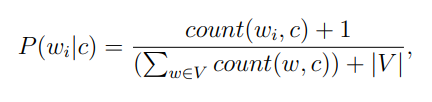 </br>
where vocabulary $V$ consists of the union of all word types in all classes.

In [12]:
# Find log prior probabilities and log likelihood for each word/ class
Nc_counts  =train_set['sentiment'].value_counts()
prior_prob = {}
N_doc = len(train_set['sentiment'])
for sentiment, Nc in Nc_counts.items():
  prior_prob[sentiment] = m.log(Nc/N_doc)

In [13]:
# create dict for word counts
counts = {}
for l in range(len(train_set.sentiment.unique())): # dict for each class
    counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = encoded_labels[i]
    for j in range(len(vocab)):
        counts[l][vocab[j]] += X[i][j]

In [14]:
def likelihood(w,counts,sentiment,encoder,vocab):
  nom = counts[encoder.transform([sentiment])[0]][w] + 1
  denom = sum(counts[encoder.transform([sentiment])[0]].values()) + len(vocab)
  return m.log(nom/denom)

In [15]:
def prediction(tweets,counts,encoder,vocab,sentiments,prior_prob):
  predictions = []
  for tweet in tweets:
    log_prob = {i: prior_prob[i] for i in sentiments}
    tweet = (word_tokenize(tweet))
    for w in tweet:
      for i in sentiments:
        log_likelihood = likelihood(w,counts,i,encoder,vocab)
        log_prob[i] += log_likelihood
    predictions.append(max(log_prob, key=log_prob.get))
  return predictions

sentiments = train_set['sentiment'].unique()

* **Testing the Na¨ıve Bayes Classifier** 


Given a test data point, and the set of prior probabilities and likelihoods, we need to return the **best** class $c$. </br>
We will create a vector **sum** of length equal to the number
of classes. For each class $c$, we will initially add our prior probability. Then for each word in the test data in our vocabulary, we will add the corresponding likelihood.
Finally, the maximum index of our **sum** vector will be the predicted class for the test data point.

In [16]:
pred = prediction(test_set['content'],counts,encoder,vocab,sentiments,prior_prob)

# ---------

* Evaluation function </br>

It calculates classification accuracy, F1 score and confusion
matrix. Pass the labels of test data in this function and report your results.

In [17]:

print('accuracy: ', accuracy_score(test_set.sentiment, pred))
print('confusion matrix:\n',confusion_matrix(test_set.sentiment,pred))
print(classification_report(test_set.sentiment, pred))


accuracy:  0.729525120440468
confusion matrix:
 [[700 164  60]
 [ 68 180  42]
 [ 24  35 180]]
              precision    recall  f1-score   support

    negative       0.88      0.76      0.82       924
     neutral       0.47      0.62      0.54       290
    positive       0.64      0.75      0.69       239

    accuracy                           0.73      1453
   macro avg       0.67      0.71      0.68      1453
weighted avg       0.76      0.73      0.74      1453



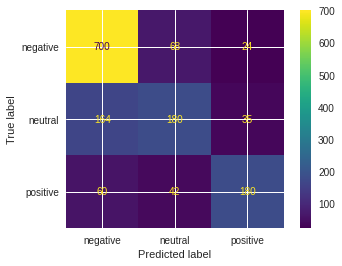

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(pred,test_set.sentiment)

plt.show()

**Part-4: Implementation of Na¨ıve Bayes classifier using
Scikit-Learn (10 marks)**

Use Scikit-Learn’s implementation of the na¨ıve Bayes classifier on the bag of words. Remember to implement one vs rest model with the in-built classifier in binary classification mode. </br>
Report the accuracy, F1 score, and confusion matrix of test using the library’s
implementation.

In [19]:
##BOW for test set
matrix_test = np.zeros((len(test_set.content),len(vocab)))
for i,tweet in enumerate(test_set['content']) :
  for word in word_tokenize(tweet):
    try:
      ind = vocab.index(word)
      matrix_test[i][ind]+=1
    except:
      pass


In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB

clf = OneVsRestClassifier(MultinomialNB()).fit(matrix, train_set['sentiment'])


In [21]:
pred = clf.predict(matrix_test)

In [22]:
print('accuracy: ', accuracy_score(test_set.sentiment, pred))
print('confusion matrix:\n',confusion_matrix(test_set.sentiment,pred))
print(classification_report(test_set.sentiment, pred))



accuracy:  0.7391603578802478
confusion matrix:
 [[722 159  43]
 [ 71 176  43]
 [ 27  36 176]]
              precision    recall  f1-score   support

    negative       0.88      0.78      0.83       924
     neutral       0.47      0.61      0.53       290
    positive       0.67      0.74      0.70       239

    accuracy                           0.74      1453
   macro avg       0.68      0.71      0.69      1453
weighted avg       0.77      0.74      0.75      1453

